In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.drop(["CustomerID"], axis = 1, inplace=True)

<ipython-input-13-a0cd91c0f50d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


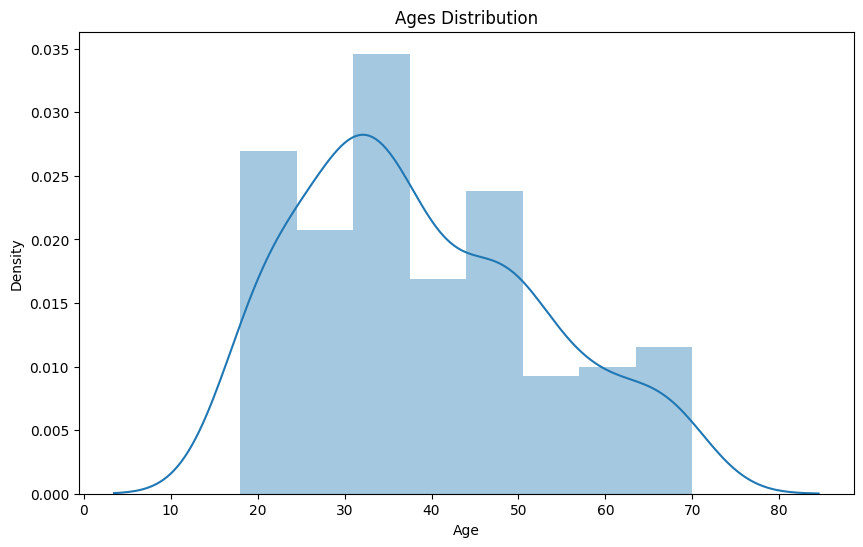

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Ages Distribution")
sns.axes_style("dark")
sns.distplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


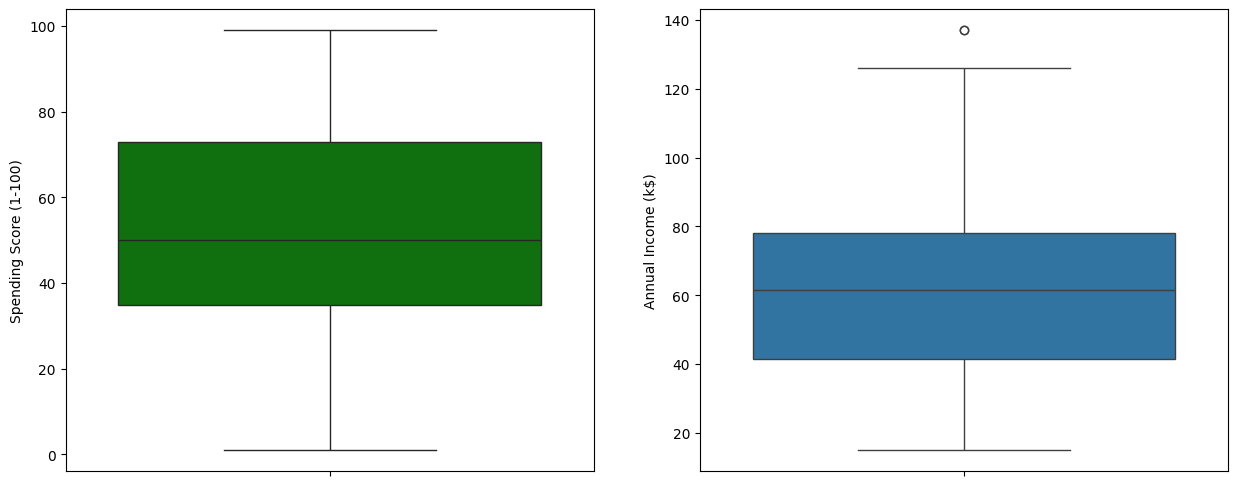

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="green")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

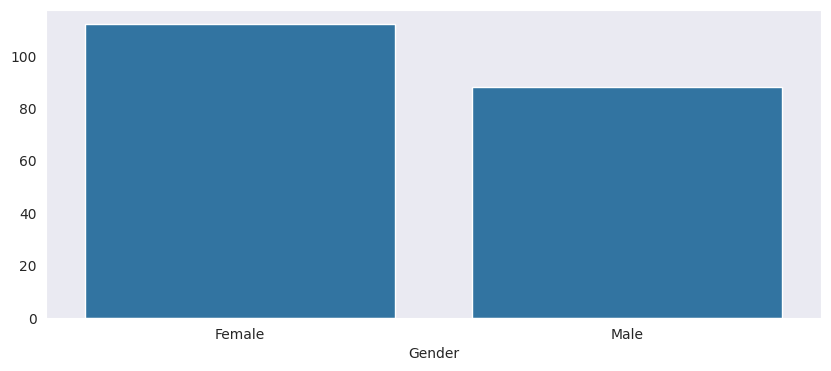

In [ ]:
genders = df.Gender.value_counts()
sns.set_style("dark")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [ ]:
df.Gender.value_counts()

,count
Gender,
Female,112
Male,88


In [ ]:
#change Gender data type to category
df["Gender"] = df["Gender"].astype("category")
#do categorical encoding of the column
df["Gender"] = df["Gender"].cat.codes

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


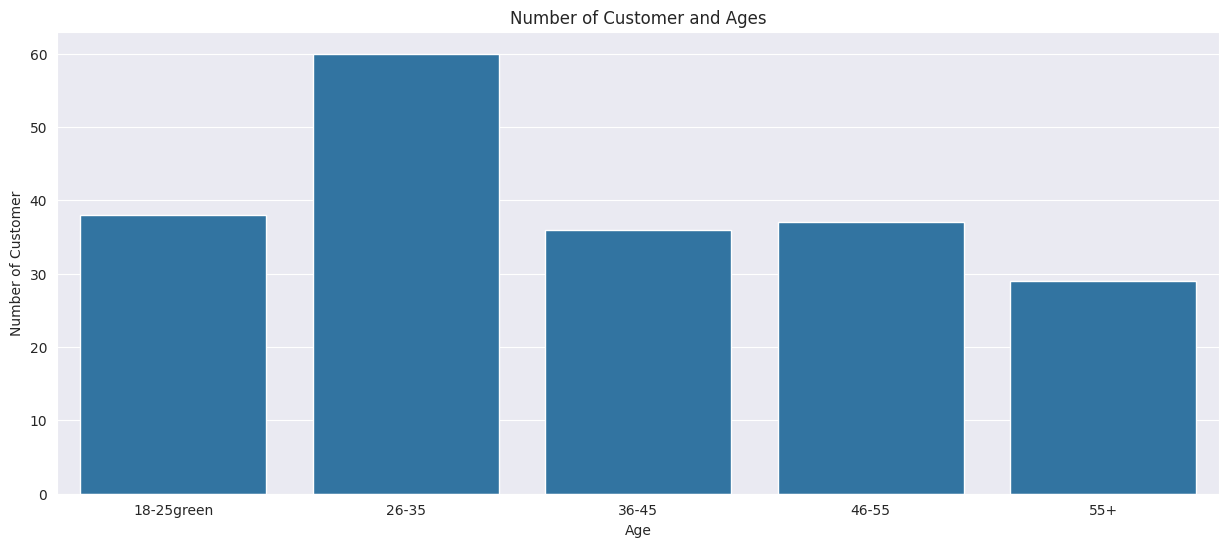

In [ ]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y)
sns.set_style("darkgrid")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [ ]:
len(age18_25.values)

38

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWar

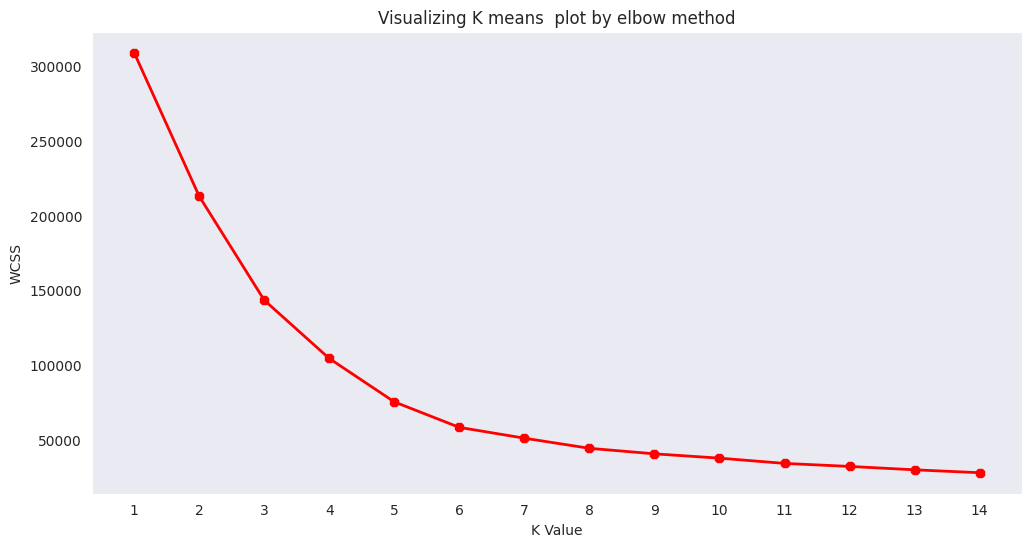

In [ ]:
from sklearn.cluster import KMeans
#make empty list
wcss = []
#loop from 1 to 14 that is from k = 1 to k = 14. This means that the algorithm will run 14 times.
for k in range(1,15):
    #intialize the algorithm. First for k = 1
    kmeans = KMeans(n_clusters=k,algorithm = "full")
    #fit the algorithm
    kmeans.fit(df)
    # inertia : Sum of squared distances of samples to their closest cluster center
    #which we defined as wcss in formula
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.title("Visualizing K means  plot by elbow method")
plt.show()


In [ ]:
kmeans.cluster_centers_

array([[  0.22222222,  40.44444444, 111.        ,  22.77777778],
       [  0.5       ,  60.92857143,  50.89285714,  50.10714286],
       [  0.42857143,  32.78571429,  77.78571429,  73.28571429],
       [  0.42857143,  25.33333333,  25.0952381 ,  80.04761905],
       [  0.41666667,  48.75      ,  24.58333333,   9.58333333],
       [  0.33333333,  32.22222222,  99.44444444,  84.44444444],
       [  0.875     ,  28.        ,  78.25      ,   8.25      ],
       [  0.53846154,  33.        ,  77.53846154,  90.84615385],
       [  0.375     ,  23.0625    ,  64.25      ,  45.5625    ],
       [  0.34782609,  46.08695652,  60.86956522,  46.47826087],
       [  0.4       ,  39.        ,  27.2       ,  33.1       ],
       [  0.33333333,  26.94444444,  47.22222222,  54.16666667],
       [  0.66666667,  32.33333333, 127.66666667,  78.66666667],
       [  0.5625    ,  48.75      ,  82.1875    ,  16.4375    ]])

In [ ]:
kmeans.inertia_


28036.598920342945

In [ ]:
kmeans.labels_


array([10,  3,  4,  3, 10,  3,  4,  3,  4,  3,  4,  3,  4,  3,  4,  3, 10,
        3, 10,  3, 10,  3,  4,  3,  4,  3, 10,  3, 10,  3,  4,  3,  4,  3,
        4,  3,  4,  3, 10,  3,  1,  3, 10, 11, 10, 11,  1, 11, 11, 11,  1,
       11, 11,  1,  1,  1,  1,  1, 11,  1,  1, 11,  1,  1,  1, 11,  9,  1,
       11, 11,  1,  9,  1,  1,  1, 11,  9,  9, 11,  9,  1, 11,  1,  9, 11,
        9,  1, 11, 11,  9,  1,  8,  9,  9,  8,  8,  9,  8,  9,  8,  8,  9,
        1,  8,  9,  8,  1,  9,  1,  1,  1,  8,  9,  8,  8,  8,  1,  9,  9,
        9,  8,  9,  9,  7,  8,  2,  9,  7, 13,  2, 13,  2,  8,  2,  6,  7,
       13,  2,  6,  2, 13,  7,  8,  7,  6,  7,  9,  2,  6,  7, 13,  7, 13,
        2, 13,  7,  6,  2,  6,  2, 13,  7,  6,  7, 13,  2, 13,  7, 13,  2,
       13,  2,  6,  7, 13,  5, 13,  2, 13,  5,  0,  5, 13,  5,  0,  5,  0,
        5,  0,  5,  0,  5,  0,  5,  0, 12,  0, 12,  0, 12], dtype=int32)

In [ ]:
kmeans

KMeans(algorithm='full', n_clusters=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


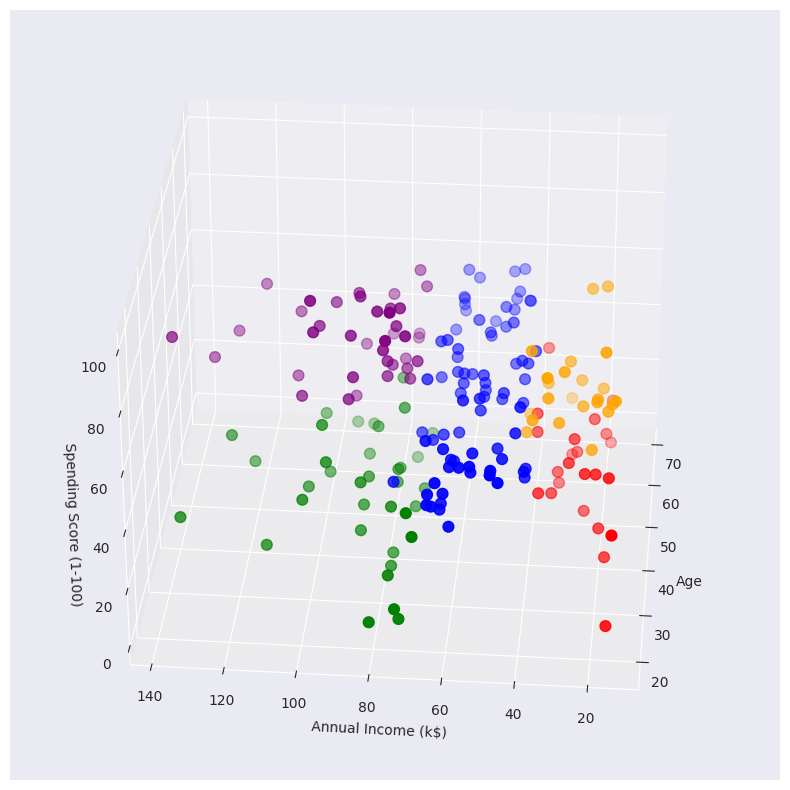

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=5)
clusters = km.fit_predict(df)
df["label"] = clusters

#-------------------------------------------------------------------------------------------------------------------------------
#optional plotting to make you understand how the algorithm worked

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()